In [1]:
import os
os.getcwd()

'/Users/anarpereira/Docs_tcc/TCC'

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
import os
import random
from PIL import Image

In [3]:
diretorio_base= '/Users/anarpereira/Docs_tcc/TCC/MIND.FungaApp_COMPLETA/'

## Conhecendo os dados

Existem 509 classes de cogumelos, algumas classes possuem menos que 10 exemplos, as classes com menos de 10 exemplos vao ser removidas. 
Para algumas classes, já possui imagens tratadas, com fundo verde/preto/branco

In [4]:
import os
import pandas as pd

datafiles_to_exclude = []
datafiles_to_stay = []
files_path_to_exclude = []
foldes = []

df = pd.DataFrame(columns=['qty_files', 'folder', 'file_paths'])  # Cria um DataFrame vazio com as colunas desejadas

for pasta in os.listdir(diretorio_base):
    caminho_pasta = os.path.join(diretorio_base, pasta)
    if 'PRE_PROCESSING' not in caminho_pasta:
        if os.path.isdir(caminho_pasta):
            
            # Obtém os arquivos da pasta
            arquivos = os.listdir(caminho_pasta)

            files_path = [os.path.join(pasta, arquivo) for arquivo in arquivos if (('verde' not in arquivo) 
                                                                                   and ('branco' not in arquivo)
                                                                                   and ('(1)' not in arquivo)
                                                                                   and ('cópia' not in arquivo)
                                                                                   and ('copia' not in arquivo)
                                                                                   and ('Copia' not in arquivo))]

            files_path_to_exclude = [os.path.join(pasta, arquivo) for arquivo in arquivos if (('verde' in arquivo) 
                                                                                   or ('branco' in arquivo) 
                                                                                   or ('(1)' in arquivo)
                                                                                   or ('outracópia' in arquivo)
                                                                                   or ('cópia' in arquivo)
                                                                                   or ('copia' in arquivo)
                                                                                   or ('Copia' in arquivo))]

            # Cria um DataFrame temporário com as informações da iteração atual
            temp_df = pd.DataFrame({'qty_files': len(files_path), 'folder': pasta, 'file_paths': [files_path]}, index=[0])

            # Concatena o DataFrame temporário com o DataFrame principal
            df = pd.concat([df, temp_df], ignore_index=True)

            if len(files_path) < 100:
                foldes.append(pasta)
            else:
                datafiles_to_stay.extend(files_path)

            datafiles_to_exclude.extend(files_path_to_exclude)

In [5]:
# import shutil
# for i in foldes:
#     shutil.rmtree(diretorio_base + i)

In [6]:
# for f in os.listdir(diretorio_base):
#     r = f.replace(" ","")
#     if( r != f):
#         os.rename(diretorio_base + f,diretorio_base + r)

In [7]:
# for i in datafiles_to_exclude:
#     try:
#         os.remove(diretorio_base + i)
#     except:
#         continue

In [8]:
# for i in os.listdir(diretorio_base):
#     if '.DS_Store' not in i:
#         for j in os.listdir(diretorio_base + i):
#             r = j.replace(" ","")
#             if( r != f):
#                 os.rename(diretorio_base + i + '/' + j, diretorio_base + i + '/' + r)

In [9]:
df['qty_files'].astype(int).describe()

count    509.000000
mean      26.638507
std       39.769649
min        0.000000
25%        6.000000
50%       14.000000
75%       31.000000
max      358.000000
Name: qty_files, dtype: float64

In [10]:
df['qty_files'] = df['qty_files'].astype(int)

In [11]:
df

,qty_files,folder,file_paths
0,11,Entolomatricholomatoideum,[Entolomatricholomatoideum/LUARSnumeroFK1049(2...
1,131,Favolusbrasiliensis,[Favolusbrasiliensis/SSPolyporales_Favolus_ten...
2,1,Cladoniarappii,[Cladoniarappii/Cladoniarappii_SBUru(653)Emers...
3,24,Cystidiodontiacflaminifera,[Cystidiodontiacflaminifera/MIND0444(21)(quadr...
4,2,SebacinaTremellodendroncfschweinitzii,[SebacinaTremellodendroncfschweinitzii/02-SSTr...
...,...,...,...
504,14,Hypotrachynapluriformis,[Hypotrachynapluriformis/MINDFungaDisciplinaAs...
505,4,Hypholomasp,[Hypholomasp/CCMINDFunga-210521190509Cogumeloc...
506,59,Trogiacantharelloides,"[Trogiacantharelloides/01-FK20170322(7).jpg, T..."
507,28,Panaeolusantillarum,[Panaeolusantillarum/SusanneSourell2014Pantana...


In [12]:
df[df['qty_files']>100].shape

(22, 3)

In [13]:
altura_largura = []

In [14]:
datafiles_to_stay_backspace = [i.replace(' ','') for i in datafiles_to_stay]

Favolusbrasiliensis/SSPolyporales_Favolus_tenuiculus_PA160338_16_10_2016_Sani_Lodge_Ecuador(3).jpg


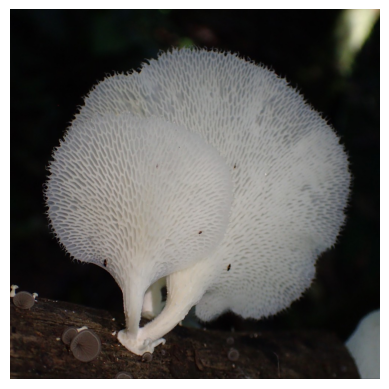

Favolusbrasiliensis/SSFavolus-sp-BAS-BR-CJL-P1042261.jpg


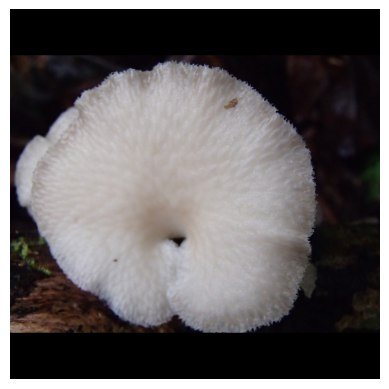

Favolusbrasiliensis/SSSusanneSourell2014Pantanal(1820).jpg


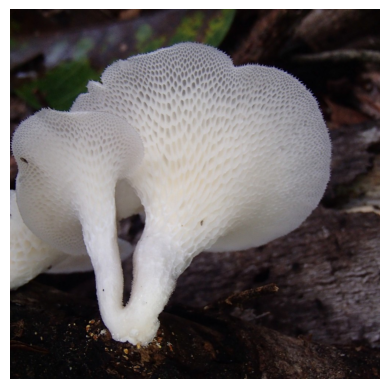

Favolusbrasiliensis/SS-sp-BAS-BR-CJL-PC313062.jpg


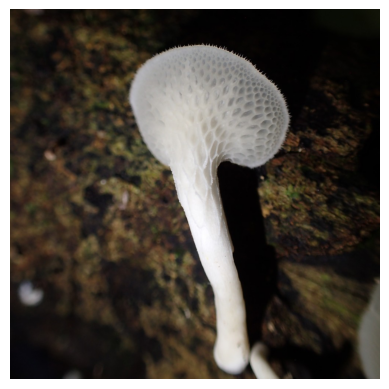

Favolusbrasiliensis/SSFavolus-sp-BAS-BR-CJL-P1047047.jpg


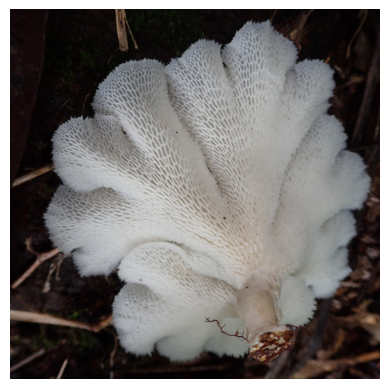

Favolusbrasiliensis/FK20160617_123345(2)(outracópia).jpg


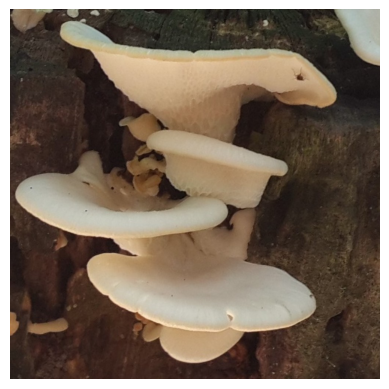

Favolusbrasiliensis/SSFavolus-sp-BAS-BR-CJL-P1032156.jpg


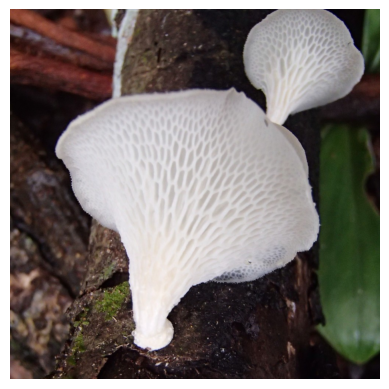

Favolusbrasiliensis/SS-sp-BAS-BR-CJL-PC313063.jpg


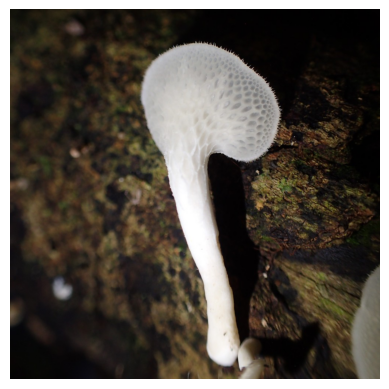

Favolusbrasiliensis/00-FKnc20161209_094654(2).jpg


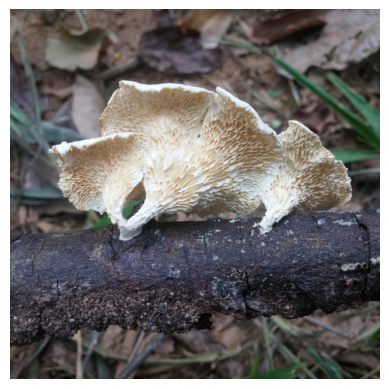

Favolusbrasiliensis/FB512-Favolustenuiculus(7)(outracópia).jpg


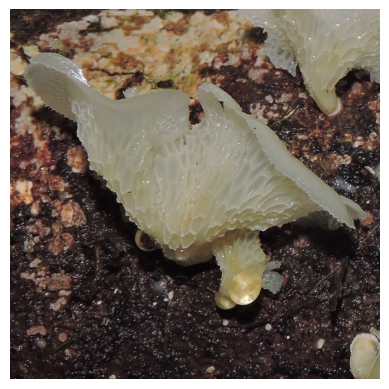

Favolusbrasiliensis/SS-sp-BAS-BR-CJL-P1119844.jpg


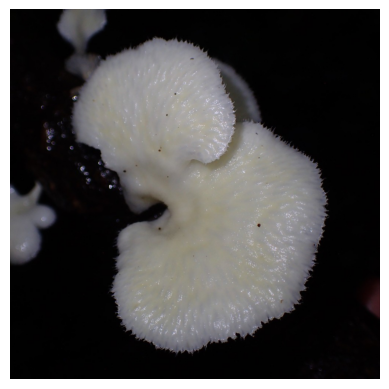

In [18]:
from pathlib import Path
count=0
for caminho_completo in datafiles_to_stay_backspace:
    count=count+1
    with open(diretorio_base + caminho_completo, 'rb') as arquivo_imagem:
        print(caminho_completo)
        imagem = mpimg.imread(arquivo_imagem)
        plt.imshow(imagem)
        plt.axis('off')  # Desativa a exibição dos eixos
        plt.show()

    if count > 10:
        break

In [16]:
files = []
foldes = []

df = pd.DataFrame(columns=['qty_files', 'folder', 'file_paths'])  # Cria um DataFrame vazio com as colunas desejadas

for pasta in os.listdir(diretorio_base):
    caminho_pasta = os.path.join(diretorio_base, pasta)
    if os.path.isdir(caminho_pasta):
        # Obtém os arquivos da pasta
        arquivos = os.listdir(caminho_pasta)
        
        files_path = [os.path.join(pasta, arquivo) for arquivo in arquivos]

        # Cria um DataFrame temporário com as informações da iteração atual
        temp_df = pd.DataFrame({'qty_files': len(files_path), 'folder': pasta, 'file_paths': [files_path]}, index=[0])
        
        # Concatena o DataFrame temporário com o DataFrame principal
        df = pd.concat([df, temp_df], ignore_index=True)
        files.extend(files_path)

In [17]:
df.shape

(509, 3)

In [18]:
df['qty_files'].astype(int).describe()

count    509.000000
mean      35.363458
std       54.145578
min        1.000000
25%        8.000000
50%       20.000000
75%       41.000000
max      714.000000
Name: qty_files, dtype: float64

In [19]:
df[df['qty_files']>100].shape

(33, 3)

In [20]:
df[df['qty_files']>100].sort_values(by='qty_files', ascending=False)[:5]['folder'].to_list()

['Marasmiusamazonicus',
 'Cookeinatricholoma',
 'Phallusindusiatuscomplex',
 'Schizophyllumcommune',
 'Oudemansiellacubensis']

### Dimensoes das imagens

Todas as imagens do dataset tem 1000px por 1000

Vamos redimensionar para 224x224

In [21]:
files_out_default = []
for caminho_completo in files:
    if '.ipynb' not in caminho_completo:
        with open(diretorio_base + caminho_completo, 'rb') as arquivo_imagem:
            altura, largura = Image.open(diretorio_base + caminho_completo).size
            if altura != 1000 or largura != 1000:
                files_out_default.append(diretorio_base + caminho_completo)

In [22]:
l_folders = [os.path.join(diretorio_base, i) for i in df[df['qty_files']>100].sort_values(by='qty_files', ascending=False)[:5]['folder'].to_list()]

In [23]:
for pasta in l_folders:
    new_directory = os.path.join(pasta + '_PRE_PROCESSING')
    if not os.path.exists(new_directory):
        os.makedirs(new_directory, exist_ok=True) 

    for file, count in zip(os.listdir(pasta), range(0, len(os.listdir(pasta)))):
        if '.jpg' in file:
            img = Image.open(os.path.join(pasta, file))
            resized = img.resize((224, 224))
            resized.save(os.path.join(new_directory, file.replace('.jpg', '') + f'_{count}.jpg'))        